#I. Data folder

Data are saved in three relevant files: \*SegmentedNuclei.csv, \*ShrunkenNuclei.csv and \*Speckles.csv. For the purpose of the project (recognizing discrimanant variables for follow-up hypothesis-driven experimentation), only the first two will be considered.

In [1]:
!ls -lh ../../REVISION/Output/

total 64936
-rw-r--r--  1 Tango  staff    24K Dec 10 01:57 MyExpt_trial1Experiment.csv
-rw-r--r--  1 Tango  staff   239K Dec 10 01:57 MyExpt_trial1Image.csv
-rw-r--r--  1 Tango  staff   9.6M Dec 10 01:57 MyExpt_trial1SegmentedNuclei.csv
-rw-r--r--  1 Tango  staff   9.2M Dec 10 01:58 MyExpt_trial1ShrunkenNuclei.csv
-rw-r--r--  1 Tango  staff    13M Dec 10 01:58 MyExpt_trial1Speckles.csv


Below, we will determine how many columns/variables we have in the dataset.

In [2]:
!head -n2 ../../REVISION/Output/MyExpt_trial1SegmentedNuclei.csv | awk 'BEGIN{FS=","}{print NF}'

155
155


In [3]:
!wc -l ../../REVISION/Output/MyExpt_trial1SegmentedNuclei.csv

    3550 ../../REVISION/Output/MyExpt_trial1SegmentedNuclei.csv


In [4]:
!head -n2 ../../REVISION/Output/MyExpt_trial1ShrunkenNuclei.csv | awk 'BEGIN{FS=","}{print NF}'

177
177


In [5]:
!wc -l ../../REVISION/Output/MyExpt_trial1ShrunkenNuclei.csv

    3550 ../../REVISION/Output/MyExpt_trial1ShrunkenNuclei.csv


In [6]:
!head -n2 ../../REVISION/Output/MyExpt_trial1Speckles.csv | awk 'BEGIN{FS=","}{print NF}'

82
82


In [7]:
!wc -l ../../REVISION/Output/MyExpt_trial1Speckles.csv 

    9039 ../../REVISION/Output/MyExpt_trial1Speckles.csv


#II. Dataset preparation    
##Exploratory variable analysis and final dataset assembly 
In general, data are spread across the three files listed above, albeit there is most likely quite some redundancy. In the spirit of Andrew Ng advice, we'll build one dataset and then drop some of the feaures. Speckle descriptors are not analyzed in depth.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
pd.set_option('display.mpl_style','default')

from matplotlib.backends.backend_pdf import PdfPages

import sklearn

%load_ext rpy2.ipython
%matplotlib inline

In [9]:
!head -n2 ../../REVISION/Output/MyExpt_trial1SegmentedNuclei.csv

In [277]:
!head -n2 ../../REVISION/Output/MyExpt_trial1ShrunkenNuclei.csv

In [11]:
!head -n2 ../../REVISION/Output/MyExpt_trial1Speckles.csv 

In [70]:
df_nuclei = pd.read_csv('../../REVISION/Output/MyExpt_trial1SegmentedNuclei.csv')
df_nuclei_orig = pd.read_csv('../../REVISION/Output_AWG_PIPE2/MyExpt_Chromatin.csv')
df_sh_nuclei = pd.read_csv('../../REVISION/Output/MyExpt_trial1ShrunkenNuclei.csv')


Accessories:   
**Object locators** are defined by a suffix \_X and \_Y. 
Have in mind that the way the speckles are spatially distributed may have a significance too. Here, we'll ignore this aspect.    
**Metadata** contain experimental details. They are in fact categorical explanatory variables. 

In [330]:
df_nuclei.ImageNumber.head(), \
df_sh_nuclei.ImageNumber.head(), \
df_nuclei.ObjectNumber.head(), \
df_sh_nuclei.ObjectNumber.head(), \
df_nuclei.Metadata_ImageID.head(), \
#df_nuclei.Metadata_FileLocation.head()[0], \
#df_sh_nuclei.Metadata_FileLocation.head()[0]

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: ImageNumber, dtype: int64, 0    1
 1    1
 2    1
 3    1
 4    1
 Name: ImageNumber, dtype: int64, 0    1
 1    2
 2    3
 3    4
 4    5
 Name: ObjectNumber, dtype: int64, 0    1
 1    2
 2    3
 3    4
 4    5
 Name: ObjectNumber, dtype: int64, 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Metadata_ImageID, dtype: int64)

Best idea is to merge data on file location.

In [331]:
#mergedDf = pd.merge(df_nuclei, df_sh_nuclei, how = 'left', on = 'Metadata_FileLocation')

In [332]:
#len(set(df_nuclei.Metadata_FileLocation).intersection(set(df_sh_nuclei.Metadata_FileLocation)))

In [333]:
#mergedDf.head()

In [334]:
#mergedDf.shape

In [261]:
df_nuclei.shape, df_sh_nuclei.shape

((3549, 155), (3549, 177))

In [224]:
def findLocatorsInDF(data_frame):
    pattern = re.compile(r'.*_X.*|.*_Y.*')
    list_of_locators = []
    for column in data_frame.columns:
        if  re.match(pattern,column) !=None:
            list_of_locators.append(re.match(pattern,column).group())
    return list_of_locators  

In [357]:
def findMetadataInDF(data_frame):
    meta_data=[]
    for col_name in data_frame.columns:
        if re.match(r'.*(data).*', col_name) != None:
            meta_data.append(re.match(r'.*(data).*', col_name).group(0))
    return list(meta_data)

In [359]:
metadata_df_nuclei = findMetadataInDF(df_nuclei).append(list(df_nuclei.columns[0:2]))
metadata_df_sh_nuclei = findMetadataInDF(df_sh_nuclei)#.append(df_sh_nuclei.columns[0:2])
#findMetadataInDF(df_nuclei), findMetadataInDF(df_sh_nuclei)

In [365]:
len(findMetadataInDF(df_nuclei))

7

In [367]:
len(list(df_nuclei.columns[0:2]))

2

In [215]:
object_locators.loc_columns

0                                    AreaShape_Center_Y
1                                    AreaShape_Center_X
2                    Location_CenterMassIntensity_X_DNA
3              Location_CenterMassIntensity_X_Rhodamine
4                    Location_CenterMassIntensity_Y_DNA
5              Location_CenterMassIntensity_Y_Rhodamine
6                                     Location_Center_X
7                                     Location_Center_Y
8                           Location_MaxIntensity_X_DNA
9                     Location_MaxIntensity_X_Rhodamine
10                          Location_MaxIntensity_Y_DNA
11                    Location_MaxIntensity_Y_Rhodamine
12    Mean_FilteredChromatin_Location_CenterMassInte...
13    Mean_FilteredChromatin_Location_CenterMassInte...
14    Mean_FilteredChromatin_Location_CenterMassInte...
15    Mean_FilteredChromatin_Location_CenterMassInte...
16             Mean_FilteredChromatin_Location_Center_X
17             Mean_FilteredChromatin_Location_C

Categories of variables:

In [207]:
df_nuclei.columns.__len__()

155

There are 155 variables.

In [89]:
df_nuclei_orig.Metadata_Treatment.unique()

array([  0, 340])

In [90]:
df_nuclei_orig.groupby('Metadata_Treatment').count()

,ImageNumber,ObjectNumber,Metadata_Experiment,Metadata_Experimenter,Metadata_FileLocation,Metadata_Frame,Metadata_Series,Metadata_Set,Metadata_cvsp,AreaShape_Area,...,Texture_Variance_Lamin_10_0,Texture_Variance_Lamin_10_90,Texture_Variance_Lamin_15_0,Texture_Variance_Lamin_15_90,Texture_Variance_Lamin_20_0,Texture_Variance_Lamin_20_90,Texture_Variance_Lamin_25_0,Texture_Variance_Lamin_25_90,Texture_Variance_Lamin_5_0,Texture_Variance_Lamin_5_90
Metadata_Treatment,,,,,,,,,,,,,,,,,,,,,
0,2191,2191,2191,2191,2191,2191,2191,2191,2191,2191,...,2191,2191,2191,2191,2191,2191,2191,2191,2191,2191
340,1791,1791,1791,1791,1791,1791,1791,1791,1791,1791,...,1791,1791,1791,1791,1791,1791,1791,1791,1791,1791


In [91]:
df_nuclei.columns.tolist()

['ImageNumber',
 'ObjectNumber',
 'Metadata_ExperimentID',
 'Metadata_FileLocation',
 'Metadata_Frame',
 'Metadata_ImageID',
 'Metadata_Series',
 'Metadata_Stain',
 'Metadata_Treatment',
 'AreaShape_Area',
 'AreaShape_Center_X',
 'AreaShape_Center_Y',
 'AreaShape_Compactness',
 'AreaShape_Eccentricity',
 'AreaShape_EulerNumber',
 'AreaShape_Extent',
 'AreaShape_FormFactor',
 'AreaShape_MajorAxisLength',
 'AreaShape_MaxFeretDiameter',
 'AreaShape_MaximumRadius',
 'AreaShape_MeanRadius',
 'AreaShape_MedianRadius',
 'AreaShape_MinFeretDiameter',
 'AreaShape_MinorAxisLength',
 'AreaShape_Orientation',
 'AreaShape_Perimeter',
 'AreaShape_Solidity',
 'AreaShape_Zernike_0_0',
 'AreaShape_Zernike_1_1',
 'AreaShape_Zernike_2_0',
 'AreaShape_Zernike_2_2',
 'AreaShape_Zernike_3_1',
 'AreaShape_Zernike_3_3',
 'AreaShape_Zernike_4_0',
 'AreaShape_Zernike_4_2',
 'AreaShape_Zernike_4_4',
 'AreaShape_Zernike_5_1',
 'AreaShape_Zernike_5_3',
 'AreaShape_Zernike_5_5',
 'AreaShape_Zernike_6_0',
 'AreaShap

In [92]:
np.sum(df_nuclei.isnull())[np.sum(df_nuclei.isnull()) != 0]
np.sum(df_sh_nuclei.isnull())[np.sum(df_sh_nuclei.isnull()) != 0]

Intensity_MassDisplacement_ImageAfterMathLamina             3549
Location_CenterMassIntensity_X_ImageAfterMathLamina         3549
Location_CenterMassIntensity_Y_ImageAfterMathLamina         3549
Math_FractionOfSignalInSpecklesInterior                     1035
Math_TotalIntegratedSpeckleIntensity                        1035
Math_TotalSpeckleAreaEstimateMicron                         1035
Math_TotalSpeckleToNucleusArea                              1035
Mean_Speckles_AreaShape_Area                                1035
Mean_Speckles_AreaShape_Center_X                            1035
Mean_Speckles_AreaShape_Center_Y                            1035
Mean_Speckles_AreaShape_Compactness                         1035
Mean_Speckles_AreaShape_Eccentricity                        1035
Mean_Speckles_AreaShape_EulerNumber                         1035
Mean_Speckles_AreaShape_Extent                              1035
Mean_Speckles_AreaShape_FormFactor                          1035
Mean_Speckles_AreaShape_M

Seems there was a 0 divisor in these 1035 rows (no nucleus area?).

In [93]:
df_nuclei.Math_TotalSpeckleToNucleusArea

0       0.032108
1            NaN
2       0.009801
3       0.001475
4            NaN
5       0.006369
6       0.013045
7       0.017047
8       0.025056
9       0.008956
10      0.002200
11      0.006035
12      0.030737
13      0.008395
14      0.016422
15      0.006115
16      0.016793
17      0.006352
18           NaN
19      0.015546
20      0.010162
21           NaN
22      0.001950
23      0.016037
24      0.005566
25      0.015070
26      0.002013
27      0.001828
28      0.019147
29      0.006349
          ...   
3519         NaN
3520    0.004839
3521         NaN
3522    0.015835
3523    0.016324
3524    0.011444
3525    0.011143
3526    0.013714
3527    0.001301
3528    0.002855
3529    0.002260
3530    0.007123
3531    0.008318
3532         NaN
3533    0.015481
3534    0.002959
3535    0.000949
3536    0.004657
3537    0.001823
3538    0.008498
3539    0.003638
3540    0.016806
3541         NaN
3542    0.014448
3543    0.034691
3544    0.013959
3545         NaN
3546         N

In [94]:
pattern = re.compile('.*speckle.*', re.IGNORECASE)

In [95]:
[re.match(pattern, colName).group() for colName in df_nuclei.columns.tolist() if re.match(pattern, colName) != None]

['Math_TotalSpeckleToNucleusArea']

In [96]:
[re.match(pattern, colName).group() for colName in df_sh_nuclei.columns.tolist() if re.match(pattern, colName) != None]

['Children_Speckles_Count',
 'Math_FractionOfSignalInSpecklesInterior',
 'Math_TotalIntegratedSpeckleIntensity',
 'Math_TotalSpeckleAreaEstimateMicron',
 'Math_TotalSpeckleToNucleusArea',
 'Mean_Speckles_AreaShape_Area',
 'Mean_Speckles_AreaShape_Center_X',
 'Mean_Speckles_AreaShape_Center_Y',
 'Mean_Speckles_AreaShape_Compactness',
 'Mean_Speckles_AreaShape_Eccentricity',
 'Mean_Speckles_AreaShape_EulerNumber',
 'Mean_Speckles_AreaShape_Extent',
 'Mean_Speckles_AreaShape_FormFactor',
 'Mean_Speckles_AreaShape_MajorAxisLength',
 'Mean_Speckles_AreaShape_MaxFeretDiameter',
 'Mean_Speckles_AreaShape_MaximumRadius',
 'Mean_Speckles_AreaShape_MeanRadius',
 'Mean_Speckles_AreaShape_MedianRadius',
 'Mean_Speckles_AreaShape_MinFeretDiameter',
 'Mean_Speckles_AreaShape_MinorAxisLength',
 'Mean_Speckles_AreaShape_Orientation',
 'Mean_Speckles_AreaShape_Perimeter',
 'Mean_Speckles_AreaShape_Solidity',
 'Mean_Speckles_AreaShape_Zernike_0_0',
 'Mean_Speckles_AreaShape_Zernike_1_1',
 'Mean_Speckles

In [97]:
pattern = re.compile('.*child.*', re.IGNORECASE)

In [98]:
[re.match(pattern, colName).group() for colName in df_nuclei.columns.tolist() if re.match(pattern, colName) != None]

[]

In [99]:
df_nuclei.columns.tolist()

['ImageNumber',
 'ObjectNumber',
 'Metadata_ExperimentID',
 'Metadata_FileLocation',
 'Metadata_Frame',
 'Metadata_ImageID',
 'Metadata_Series',
 'Metadata_Stain',
 'Metadata_Treatment',
 'AreaShape_Area',
 'AreaShape_Center_X',
 'AreaShape_Center_Y',
 'AreaShape_Compactness',
 'AreaShape_Eccentricity',
 'AreaShape_EulerNumber',
 'AreaShape_Extent',
 'AreaShape_FormFactor',
 'AreaShape_MajorAxisLength',
 'AreaShape_MaxFeretDiameter',
 'AreaShape_MaximumRadius',
 'AreaShape_MeanRadius',
 'AreaShape_MedianRadius',
 'AreaShape_MinFeretDiameter',
 'AreaShape_MinorAxisLength',
 'AreaShape_Orientation',
 'AreaShape_Perimeter',
 'AreaShape_Solidity',
 'AreaShape_Zernike_0_0',
 'AreaShape_Zernike_1_1',
 'AreaShape_Zernike_2_0',
 'AreaShape_Zernike_2_2',
 'AreaShape_Zernike_3_1',
 'AreaShape_Zernike_3_3',
 'AreaShape_Zernike_4_0',
 'AreaShape_Zernike_4_2',
 'AreaShape_Zernike_4_4',
 'AreaShape_Zernike_5_1',
 'AreaShape_Zernike_5_3',
 'AreaShape_Zernike_5_5',
 'AreaShape_Zernike_6_0',
 'AreaShap

In [100]:
df_nuclei.Metadata_Treatment.unique()

array(['R3-4si', 'control'], dtype=object)

In [101]:
df_nuclei.groupby('Metadata_Treatment').count().iloc[:,0]

Metadata_Treatment
R3-4si     1595
control    1954
Name: ImageNumber, dtype: int64

In [102]:
%R -i df_nuclei
%R -i df_nuclei_orig

Error: Insufficient values in manual scale. 4 needed but only 2 provided.


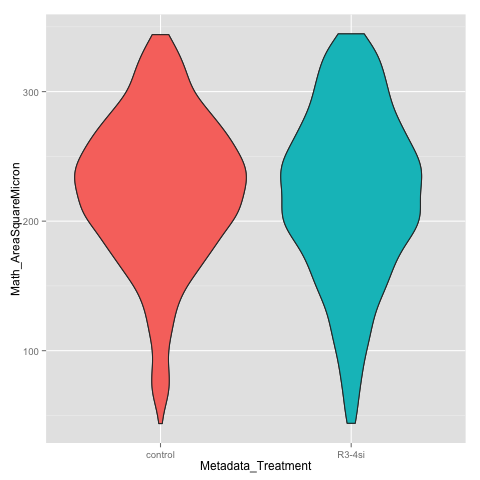

In [121]:
%%R
library(ggplot2)
#Math_AreaSquareMicron 
plot.1.m=ggplot() 
plot.1.m = plot.1+geom_violin(data=df_nuclei,aes(x=Metadata_Treatment,y=Math_AreaSquareMicron ,fill=factor(Metadata_Treatment)))
plot.1.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))

#plot.1 = plot.1+geom_violin(data=df_cont,aes(x=Metadata_Treatment,y=1/Math_AspectRatio ,fill=factor(Metadata_Treatment)))
#plot.1+theme(legend.position='none')+scale_fill_manual(values=c('#7F7F7F','#179B33'))
#ggsave('../Plots/TPX2_violin_Math_AspectRatio_5.pdf')

In [122]:
pattern = re.compile('.*Area.*',re.IGNORECASE)

In [131]:
#df_nuclei_orig.columns.tolist()

In [124]:
[re.match(pattern, colName).group() for colName in df_nuclei_orig.columns.tolist() if re.match(pattern, colName) != None]

['AreaShape_Area',
 'AreaShape_Center_X',
 'AreaShape_Center_Y',
 'AreaShape_Compactness',
 'AreaShape_Eccentricity',
 'AreaShape_EulerNumber',
 'AreaShape_Extent',
 'AreaShape_FormFactor',
 'AreaShape_MajorAxisLength',
 'AreaShape_MaxFeretDiameter',
 'AreaShape_MaximumRadius',
 'AreaShape_MeanRadius',
 'AreaShape_MedianRadius',
 'AreaShape_MinFeretDiameter',
 'AreaShape_MinorAxisLength',
 'AreaShape_Orientation',
 'AreaShape_Perimeter',
 'AreaShape_Solidity',
 'AreaShape_Zernike_0_0',
 'AreaShape_Zernike_1_1',
 'AreaShape_Zernike_2_0',
 'AreaShape_Zernike_2_2',
 'AreaShape_Zernike_3_1',
 'AreaShape_Zernike_3_3',
 'AreaShape_Zernike_4_0',
 'AreaShape_Zernike_4_2',
 'AreaShape_Zernike_4_4',
 'AreaShape_Zernike_5_1',
 'AreaShape_Zernike_5_3',
 'AreaShape_Zernike_5_5',
 'AreaShape_Zernike_6_0',
 'AreaShape_Zernike_6_2',
 'AreaShape_Zernike_6_4',
 'AreaShape_Zernike_6_6',
 'AreaShape_Zernike_7_1',
 'AreaShape_Zernike_7_3',
 'AreaShape_Zernike_7_5',
 'AreaShape_Zernike_7_7',
 'AreaShape_Zer

In [133]:
pattern = re.compile('.*texture.*',re.IGNORECASE)
[re.match(pattern, colName).group() for colName in df_nuclei_orig.columns.tolist() if re.match(pattern, colName) != None]


['Texture_AngularSecondMoment_Lamin_10_0',
 'Texture_AngularSecondMoment_Lamin_10_90',
 'Texture_AngularSecondMoment_Lamin_15_0',
 'Texture_AngularSecondMoment_Lamin_15_90',
 'Texture_AngularSecondMoment_Lamin_20_0',
 'Texture_AngularSecondMoment_Lamin_20_90',
 'Texture_AngularSecondMoment_Lamin_25_0',
 'Texture_AngularSecondMoment_Lamin_25_90',
 'Texture_AngularSecondMoment_Lamin_5_0',
 'Texture_AngularSecondMoment_Lamin_5_90',
 'Texture_Contrast_Lamin_10_0',
 'Texture_Contrast_Lamin_10_90',
 'Texture_Contrast_Lamin_15_0',
 'Texture_Contrast_Lamin_15_90',
 'Texture_Contrast_Lamin_20_0',
 'Texture_Contrast_Lamin_20_90',
 'Texture_Contrast_Lamin_25_0',
 'Texture_Contrast_Lamin_25_90',
 'Texture_Contrast_Lamin_5_0',
 'Texture_Contrast_Lamin_5_90',
 'Texture_Correlation_Lamin_10_0',
 'Texture_Correlation_Lamin_10_90',
 'Texture_Correlation_Lamin_15_0',
 'Texture_Correlation_Lamin_15_90',
 'Texture_Correlation_Lamin_20_0',
 'Texture_Correlation_Lamin_20_90',
 'Texture_Correlation_Lamin_25_

In [193]:
pattern = re.compile('.*area.*',re.IGNORECASE)
[re.match(pattern, colName).group() for colName in df_nuclei.columns.tolist() if re.match(pattern, colName) != None]

['AreaShape_Area',
 'AreaShape_Center_X',
 'AreaShape_Center_Y',
 'AreaShape_Compactness',
 'AreaShape_Eccentricity',
 'AreaShape_EulerNumber',
 'AreaShape_Extent',
 'AreaShape_FormFactor',
 'AreaShape_MajorAxisLength',
 'AreaShape_MaxFeretDiameter',
 'AreaShape_MaximumRadius',
 'AreaShape_MeanRadius',
 'AreaShape_MedianRadius',
 'AreaShape_MinFeretDiameter',
 'AreaShape_MinorAxisLength',
 'AreaShape_Orientation',
 'AreaShape_Perimeter',
 'AreaShape_Solidity',
 'AreaShape_Zernike_0_0',
 'AreaShape_Zernike_1_1',
 'AreaShape_Zernike_2_0',
 'AreaShape_Zernike_2_2',
 'AreaShape_Zernike_3_1',
 'AreaShape_Zernike_3_3',
 'AreaShape_Zernike_4_0',
 'AreaShape_Zernike_4_2',
 'AreaShape_Zernike_4_4',
 'AreaShape_Zernike_5_1',
 'AreaShape_Zernike_5_3',
 'AreaShape_Zernike_5_5',
 'AreaShape_Zernike_6_0',
 'AreaShape_Zernike_6_2',
 'AreaShape_Zernike_6_4',
 'AreaShape_Zernike_6_6',
 'AreaShape_Zernike_7_1',
 'AreaShape_Zernike_7_3',
 'AreaShape_Zernike_7_5',
 'AreaShape_Zernike_7_7',
 'AreaShape_Zer

In [125]:
%%R
str(df_nuclei_orig$Metadata_Treatment)

 int [1:3982(1d)] 0 0 0 0 0 0 0 0 0 0 ...


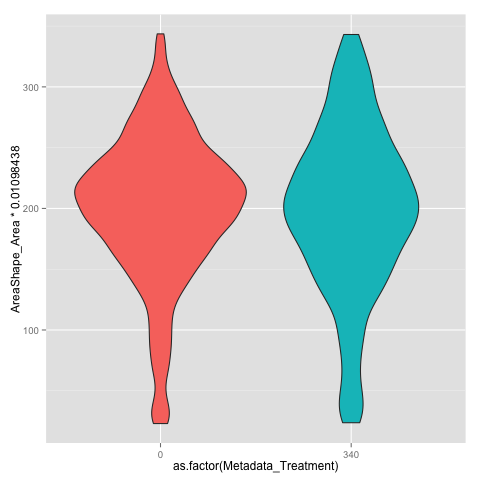

In [284]:
%%R
#Math_AreaSquareMicron 
plot.1.a=ggplot() 
plot.1.a = plot.1.a+geom_violin(data=df_nuclei_orig,aes(x=as.factor(Metadata_Treatment),y=AreaShape_Area*0.01098438 ,fill=factor(Metadata_Treatment)))
plot.1.a+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))

#plot.1 = plot.1+geom_violin(data=df_cont,aes(x=Metadata_Treatment,y=1/Math_AspectRatio ,fill=factor(Metadata_Treatment)))
#plot.1+theme(legend.position='none')+scale_fill_manual(values=c('#7F7F7F','#179B33'))

#ggsave('../Plots/Nuclei_Area_orig.pdf')

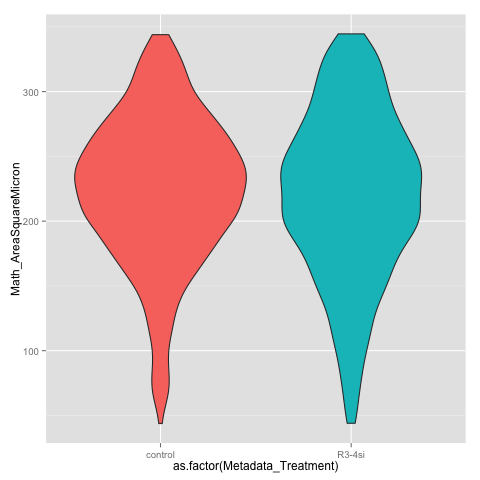

In [196]:
%%R
#Math_AreaSquareMicron 
plot.1.a=ggplot() 
plot.1.a = plot.1.a+geom_violin(data=df_nuclei,aes(x=as.factor(Metadata_Treatment),y=Math_AreaSquareMicron ,fill=factor(Metadata_Treatment)))
plot.1.a+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))

#plot.1 = plot.1+geom_violin(data=df_cont,aes(x=Metadata_Treatment,y=1/Math_AspectRatio ,fill=factor(Metadata_Treatment)))
#plot.1+theme(legend.position='none')+scale_fill_manual(values=c('#7F7F7F','#179B33'))

#ggsave('../Plots/Nuclei_Area_alternative.pdf')

In [203]:
%%R
length(df_nuclei)

[1] 155


As we don't know a priori which variables are different, we will correct for multiple comparisons. The n for BH correction will be the number of numerical variables in the dataset. See above.

In [208]:
%%R
C=df_nuclei[df_nuclei$Metadata_Treatment!='R3-4si',]$Math_AreaSquareMicron
E=df_nuclei[df_nuclei$Metadata_Treatment=='R3-4si',]$Math_AreaSquareMicron
#plot(seq(0,1,length=length(C)), cumsum(sort(C)/sum(C)),type='l',col='blue',ylab='cumulative probability',xlab='index')
#lines( seq(0,1,length=length(E)), cumsum(sort(E)/sum(E)), col='red')
#print(ks.test(df_no_centers[df_no_centers$Metadata_Treatment==0,]$Euclidian_norm_centers,df_no_centers[df_no_centers$Metadata_Treatment!=0,]$Euclidian_norm_centers,))
print(ks.test(C,E)[[2]])
print(p.adjust(ks.test(C,E)[[2]], method = "BH", n=140))

[1] 0.0004227373
[1] 0.05918322


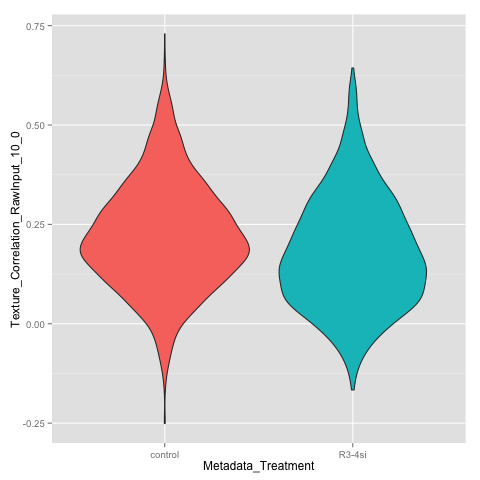

In [301]:
%%R
library(ggplot2)
#Texture_Correlation_RawInput_10_0
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_nuclei,aes(x=Metadata_Treatment,y=Texture_Correlation_RawInput_10_0 ,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))

#ggsave('../Plots/Nuclei_Texture_Correlation_RawInput_10_0_alternative.pdf')

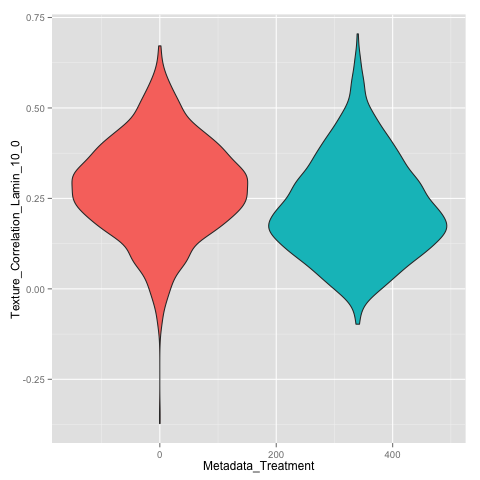

In [303]:
%%R
library(ggplot2)
#Texture_Correlation_Lamin_10_0
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_nuclei_orig,aes(x=Metadata_Treatment,y=Texture_Correlation_Lamin_10_0,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))
#ggsave('../Plots/Nuclei_Texture_Correlation_Lamin_10_0_orig.pdf')

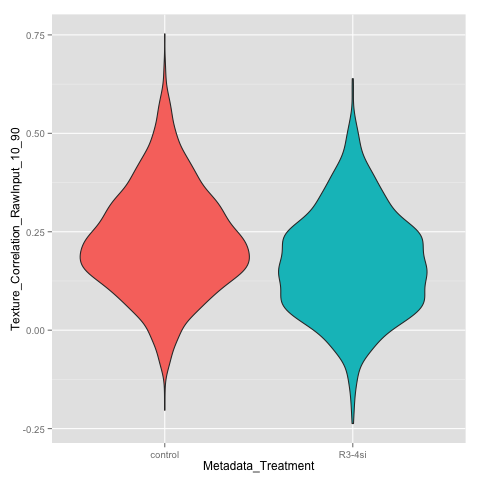

In [289]:
%%R
library(ggplot2)
#Math_AreaSquareMicron 
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_nuclei,aes(x=Metadata_Treatment,y=Texture_Correlation_RawInput_10_90 ,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))
#ggsave('../Plots/Texture_Correlation_RawInput_10_90_alternative.pdf')

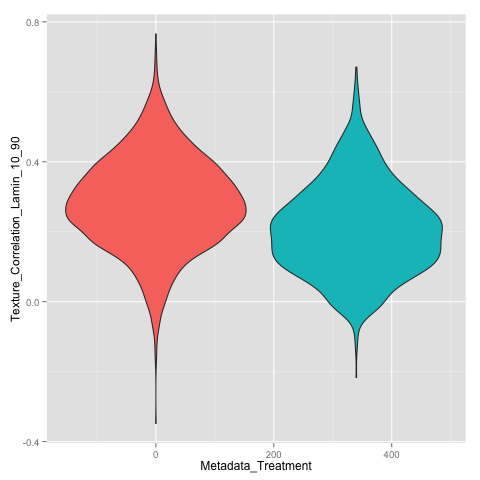

In [290]:
%%R
library(ggplot2)
#Texture_Correlation_Lamin_10_90
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_nuclei_orig,aes(x=Metadata_Treatment,y=Texture_Correlation_Lamin_10_90,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))
#ggsave('../Plots/Texture_Correlation_Lamin_10_90_orig.pdf')

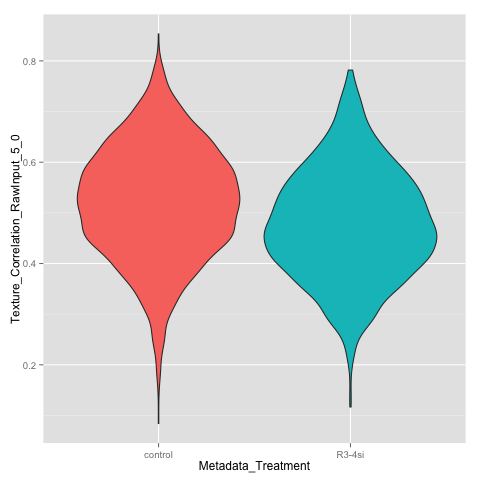

In [292]:
%%R
library(ggplot2)
#Texture_Correlation_RawInput_5_0
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_nuclei,aes(x=Metadata_Treatment,y=Texture_Correlation_RawInput_5_0 ,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))
#ggsave('../Plots/Texture_Correlation_RawInput_5_0_alternative.pdf')

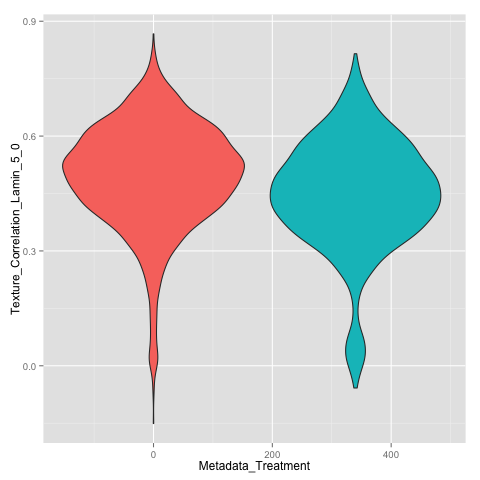

In [294]:
%%R
library(ggplot2)
#Texture_Correlation_Lamin_5_0 
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_nuclei_orig,aes(x=Metadata_Treatment,y=Texture_Correlation_Lamin_5_0,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))
#ggsave('../Plots/Texture_Correlation_Lamin_5_0_orig.pdf')

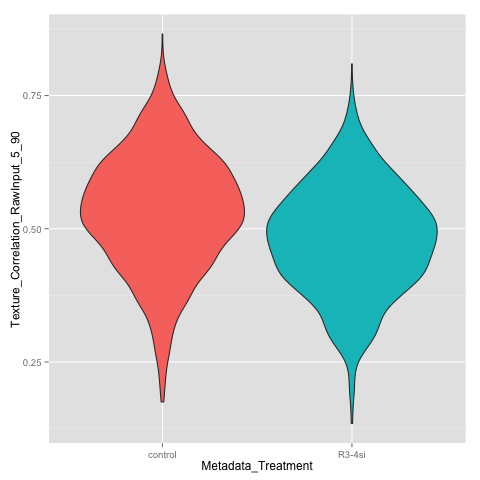

In [299]:
%%R
library(ggplot2)
#Texture_Correlation_RawInput_5_90 
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_nuclei,aes(x=Metadata_Treatment,y=Texture_Correlation_RawInput_5_90 ,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))
#ggsave('../Plots/Texture_Correlation_RawInput_5_90_alternative.pdf')

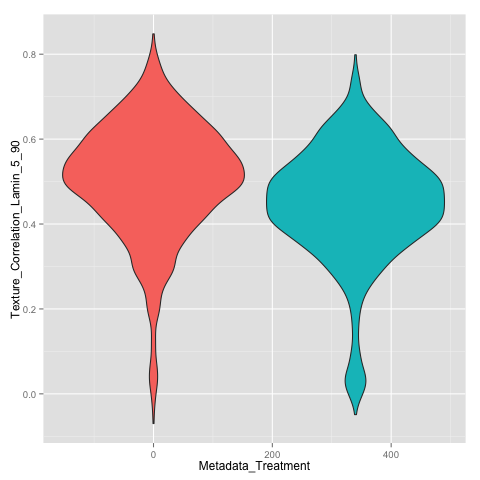

In [298]:
%%R
library(ggplot2)
#Texture_Correlation_Lamin_5_90 
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_nuclei_orig,aes(x=Metadata_Treatment,y=Texture_Correlation_Lamin_5_90,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))
#ggsave('../Plots/Texture_Correlation_Lamin_5_90_orig.pdf')

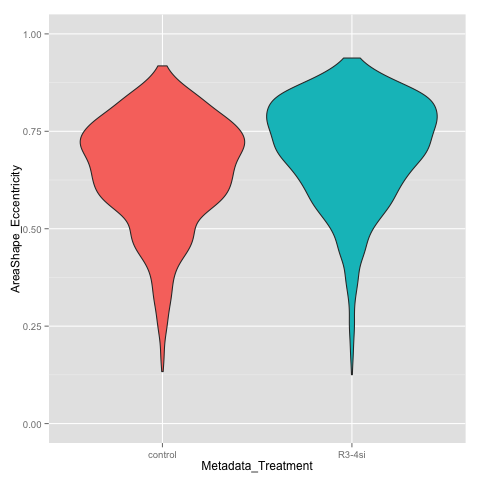

In [314]:
%%R
library(ggplot2)
#AreaShape_Eccentricity
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_nuclei,aes(x=Metadata_Treatment,y=AreaShape_Eccentricity ,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))+ylim(0.0,1.0)
#ggsave('../Plots/Nuclei_AreaShape_Eccentricity_alternative.pdf')

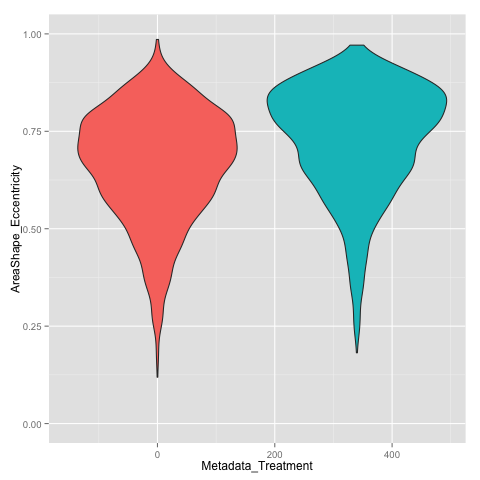

In [315]:
%%R
library(ggplot2)
#Math_AreaSquareMicron 
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_nuclei_orig,aes(x=Metadata_Treatment,y=AreaShape_Eccentricity ,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))+ylim(0.0,1.0)
#ggsave('../Plots/Nuclei_AreaShape_Eccentricity_orig.pdf')

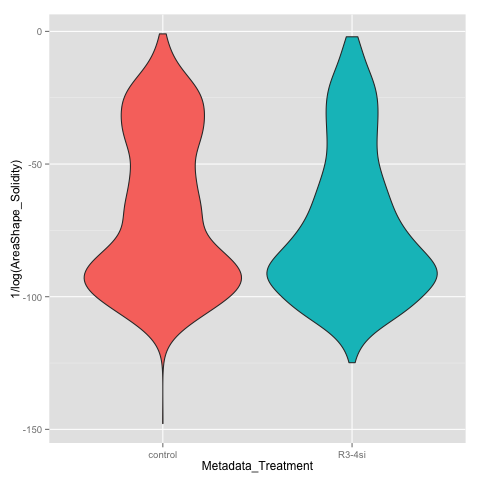

In [166]:
%%R
library(ggplot2)
#1/log(AreaShape_Solidity 
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_nuclei,aes(x=Metadata_Treatment,y=1/log(AreaShape_Solidity) ,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))

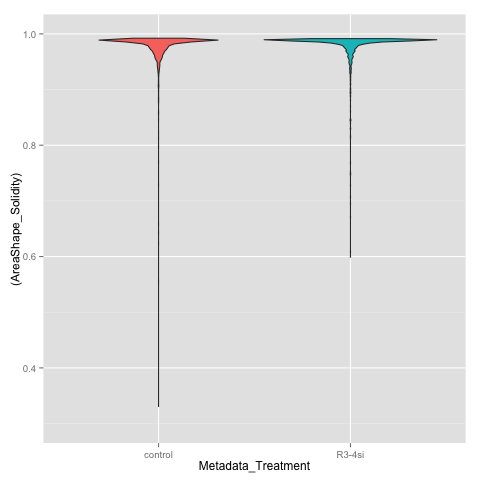

In [326]:
%%R
library(ggplot2)
#AreaShape_Solidity
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_nuclei,aes(x=Metadata_Treatment,y=(AreaShape_Solidity) ,fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4')) + ylim(0.3,1.0)
#ggsave('../Plots/Nuclei_AreaShape_Solidity_alternative.pdf')

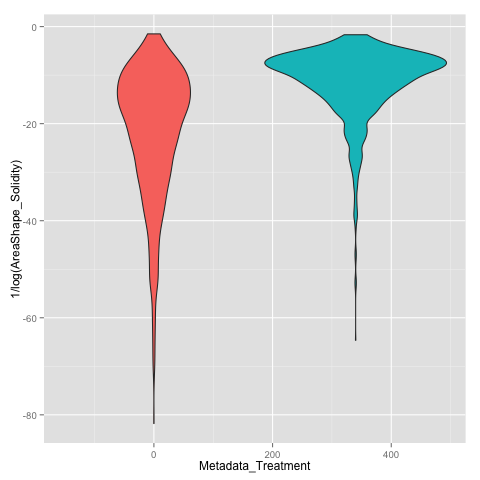

In [167]:
%%R
library(ggplot2)
#1/log(AreaShape_Solidity) 
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_nuclei_orig,aes(x=Metadata_Treatment,y=1/log(AreaShape_Solidity),fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))

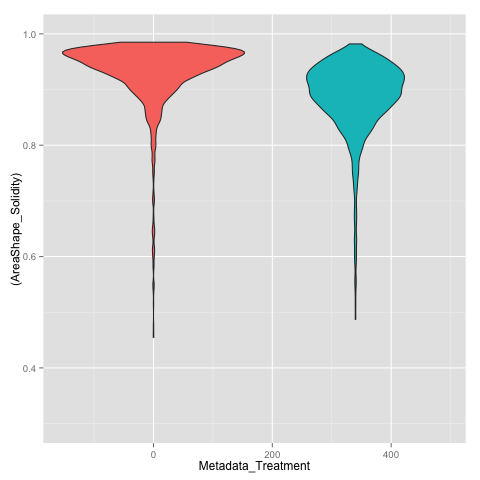

In [329]:
%%R
library(ggplot2)
#Math_AreaSquareMicron 
plot.2.m=ggplot() 
plot.2.m = plot.2.m+geom_violin(data=df_nuclei_orig,aes(x=Metadata_Treatment,y=(AreaShape_Solidity),fill=factor(Metadata_Treatment)))
plot.2.m+theme(legend.position='none')+scale_fill_manual(values=c('#F8766D','#00BFC4'))+ ylim(0.3,1.0)
#ggsave('../Plots/Nuclei_AreaShape_Solidity_orig.pdf')

In [183]:
%%R
C=df_nuclei[df_nuclei$Metadata_Treatment!='R3-4si',]$AreaShape_Solidity
E=df_nuclei[df_nuclei$Metadata_Treatment=='R3-4si',]$AreaShape_Solidity
#plot(seq(0,1,length=length(C)), cumsum(sort(C)/sum(C)),type='l',col='blue',ylab='cumulative probability',xlab='index')
#lines( seq(0,1,length=length(E)), cumsum(sort(E)/sum(E)), col='red')
#print(ks.test(df_no_centers[df_no_centers$Metadata_Treatment==0,]$Euclidian_norm_centers,df_no_centers[df_no_centers$Metadata_Treatment!=0,]$Euclidian_norm_centers,))
print(ks.test(C,E))


	Two-sample Kolmogorov-Smirnov test

data:  C and E
D = 0.096024, p-value = 1.853e-07
alternative hypothesis: two-sided



In [185]:
%%R
C=df_nuclei_orig[df_nuclei_orig$Metadata_Treatment==0,]$AreaShape_Solidity
E=df_nuclei_orig[df_nuclei_orig$Metadata_Treatment!=0,]$AreaShape_Solidity
#plot(seq(0,1,length=length(C)), cumsum(sort(C)/sum(C)),type='l',col='blue',ylab='cumulative probability',xlab='index')
#lines( seq(0,1,length=length(E)), cumsum(sort(E)/sum(E)), col='red')
#print(ks.test(df_no_centers[df_no_centers$Metadata_Treatment==0,]$Euclidian_norm_centers,df_no_centers[df_no_centers$Metadata_Treatment!=0,]$Euclidian_norm_centers,))
print(ks.test(C,E))


	Two-sample Kolmogorov-Smirnov test

data:  C and E
D = 0.42604, p-value < 2.2e-16
alternative hypothesis: two-sided

